# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [19]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

<function matplotlib.pyplot.show(close=None, block=None)>

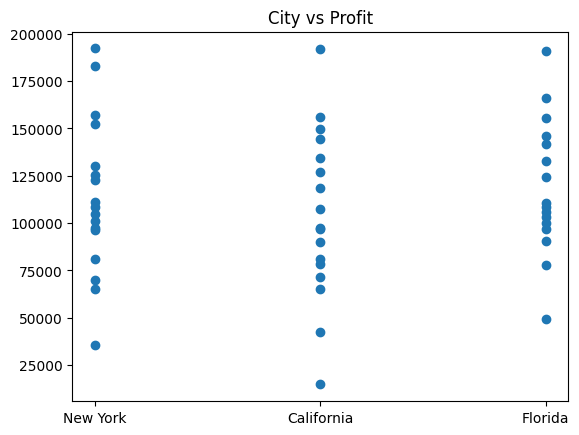

In [25]:
plt.scatter(X[:,-1], y)
plt.title('City vs Profit')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

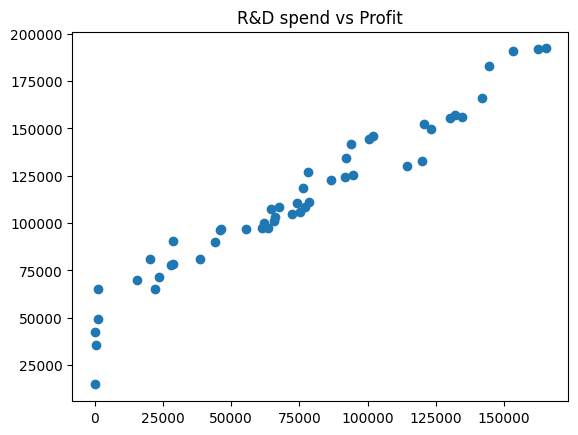

In [26]:
plt.scatter(X[:,0], y)
plt.title('R&D spend vs Profit')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

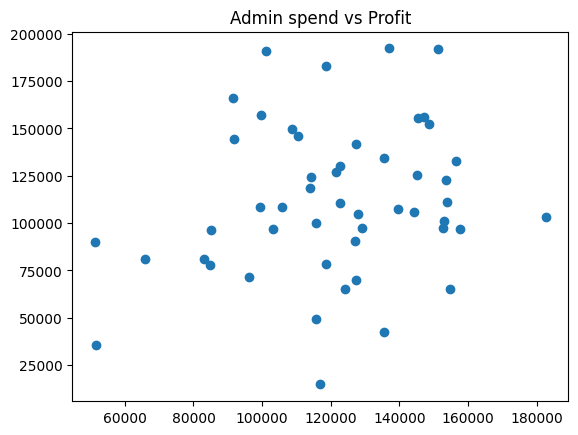

In [27]:
plt.scatter(X[:,1], y)
plt.title('Admin spend vs Profit')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

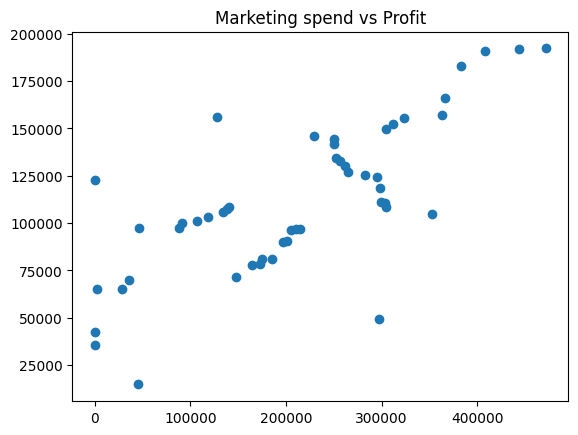

In [28]:
plt.scatter(X[:,2], y)
plt.title('Marketing spend vs Profit')
plt.show

In [3]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Encoding categorical data

In [4]:
# state is categorical feature
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])] , remainder='passthrough')
X = ct.fit_transform(X)

In [5]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Training the Multiple Linear Regression model on the Training set

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

## Predicting the Test set results

In [10]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)),axis=1))

[[114664.42 105008.31]
 [ 90593.16  96479.51]
 [ 75692.84  78239.91]
 [ 70221.89  81229.06]
 [179790.26 191050.39]
 [171576.92 182901.99]
 [ 49753.59  35673.41]
 [102276.66 101004.64]
 [ 58649.38  49490.75]
 [ 98272.03  97483.56]]


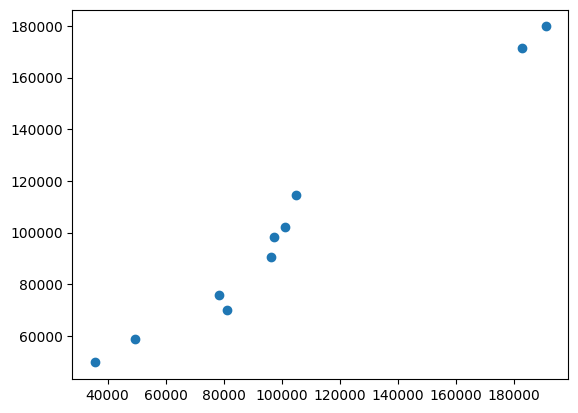

In [12]:
plt.scatter(y_test, y_pred)
plt.show()

In [14]:
regressor.coef_

array([-2.85e+02,  2.98e+02, -1.24e+01,  7.74e-01, -9.44e-03,  2.89e-02])

In [15]:
regressor.intercept_

49834.88507322592

In [16]:
# predicting profit for a startup in Florida, with R&D,Admin and Marketing spends given the order below
regressor.predict([[0.0, 0.1, 0.0, 25000., 110000.56, 34500.]])

array([69182.06])